<a href="https://colab.research.google.com/github/potiagov/MIndM/blob/main/LR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота №1

Основи індуктивного моделювання. Лінійна регресія# Новий розділ

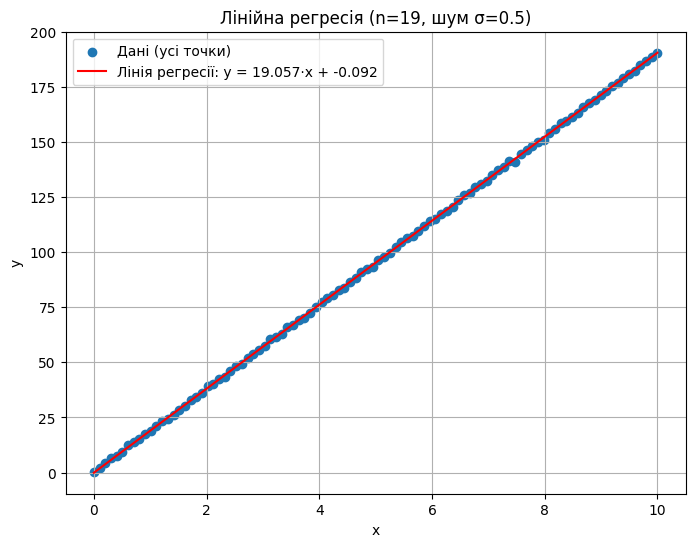

Коефіцієнти моделі:
  a (нахил) = 19.056880
  b (перетин) = -0.091905

Показники якості (тренувальна вибірка):
  MSE = 0.231730
  MAE = 0.386104
  R^2 = 0.999925

Показники якості (тестова вибірка):
  MSE = 0.138746
  MAE = 0.291837
  R^2 = 0.999954

Висновок:
  Модель добре описує залежність (R^2 великий). Лінійна апроксимація підходить.


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import random

np.random.seed(42)
random.seed(42)
n = 19
N_POINTS = 100
noise_std = 0.5

x = np.linspace(0, 10, N_POINTS)
y = n * x + np.sin(x / n) + np.random.normal(loc=0.0, scale=noise_std, size=N_POINTS)

X = x.reshape(-1, 1)
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

a = float(model.coef_[0][0])
b = float(model.intercept_[0])

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = metrics.mean_squared_error(y_train, y_train_pred)
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

mse_test = metrics.mean_squared_error(y_test, y_test_pred)
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

plt.figure(figsize=(8,6))
plt.scatter(X, y, label='Дані (усі точки)')
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, label=f'Лінія регресії: y = {a:.3f}·x + {b:.3f}', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Лінійна регресія (n={n}, шум σ={noise_std})')
plt.legend()
plt.grid(True)
plt.show()

print("Коефіцієнти моделі:")
print(f"  a (нахил) = {a:.6f}")
print(f"  b (перетин) = {b:.6f}\n")

print("Показники якості (тренувальна вибірка):")
print(f"  MSE = {mse_train:.6f}")
print(f"  MAE = {mae_train:.6f}")
print(f"  R^2 = {r2_train:.6f}\n")

print("Показники якості (тестова вибірка):")
print(f"  MSE = {mse_test:.6f}")
print(f"  MAE = {mae_test:.6f}")
print(f"  R^2 = {r2_test:.6f}\n")

print("Висновок:")
if r2_test > 0.8:
    print("  Модель добре описує залежність (R^2 великий). Лінійна апроксимація підходить.")
elif r2_test > 0.5:
    print("  Модель середньо описує залежність. Можливо, варто спробувати поліноміальну регресію або зменшити шум.")
else:
    print("  Лінійна модель погано описує дані (низький R^2). Функція містить нелінійні компоненти; розглянь інші моделі.")
